The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore


In [80]:
df=pd.read_csv("vehicle.csv")

# Ans :1 Data Preprocessing Understanding the Data

In [81]:
df.shape

(846, 19)

In [82]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [83]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [85]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df['class'].dtype == 'object': # Only apply for columns with categorical strings
        df['class'] = pd.Categorical(df['class']).codes # Replace strings with an integer

In [86]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


# Checking for null Values so we can apply Missing Value Treatment

In [87]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

C:\Users\neeha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\neeha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


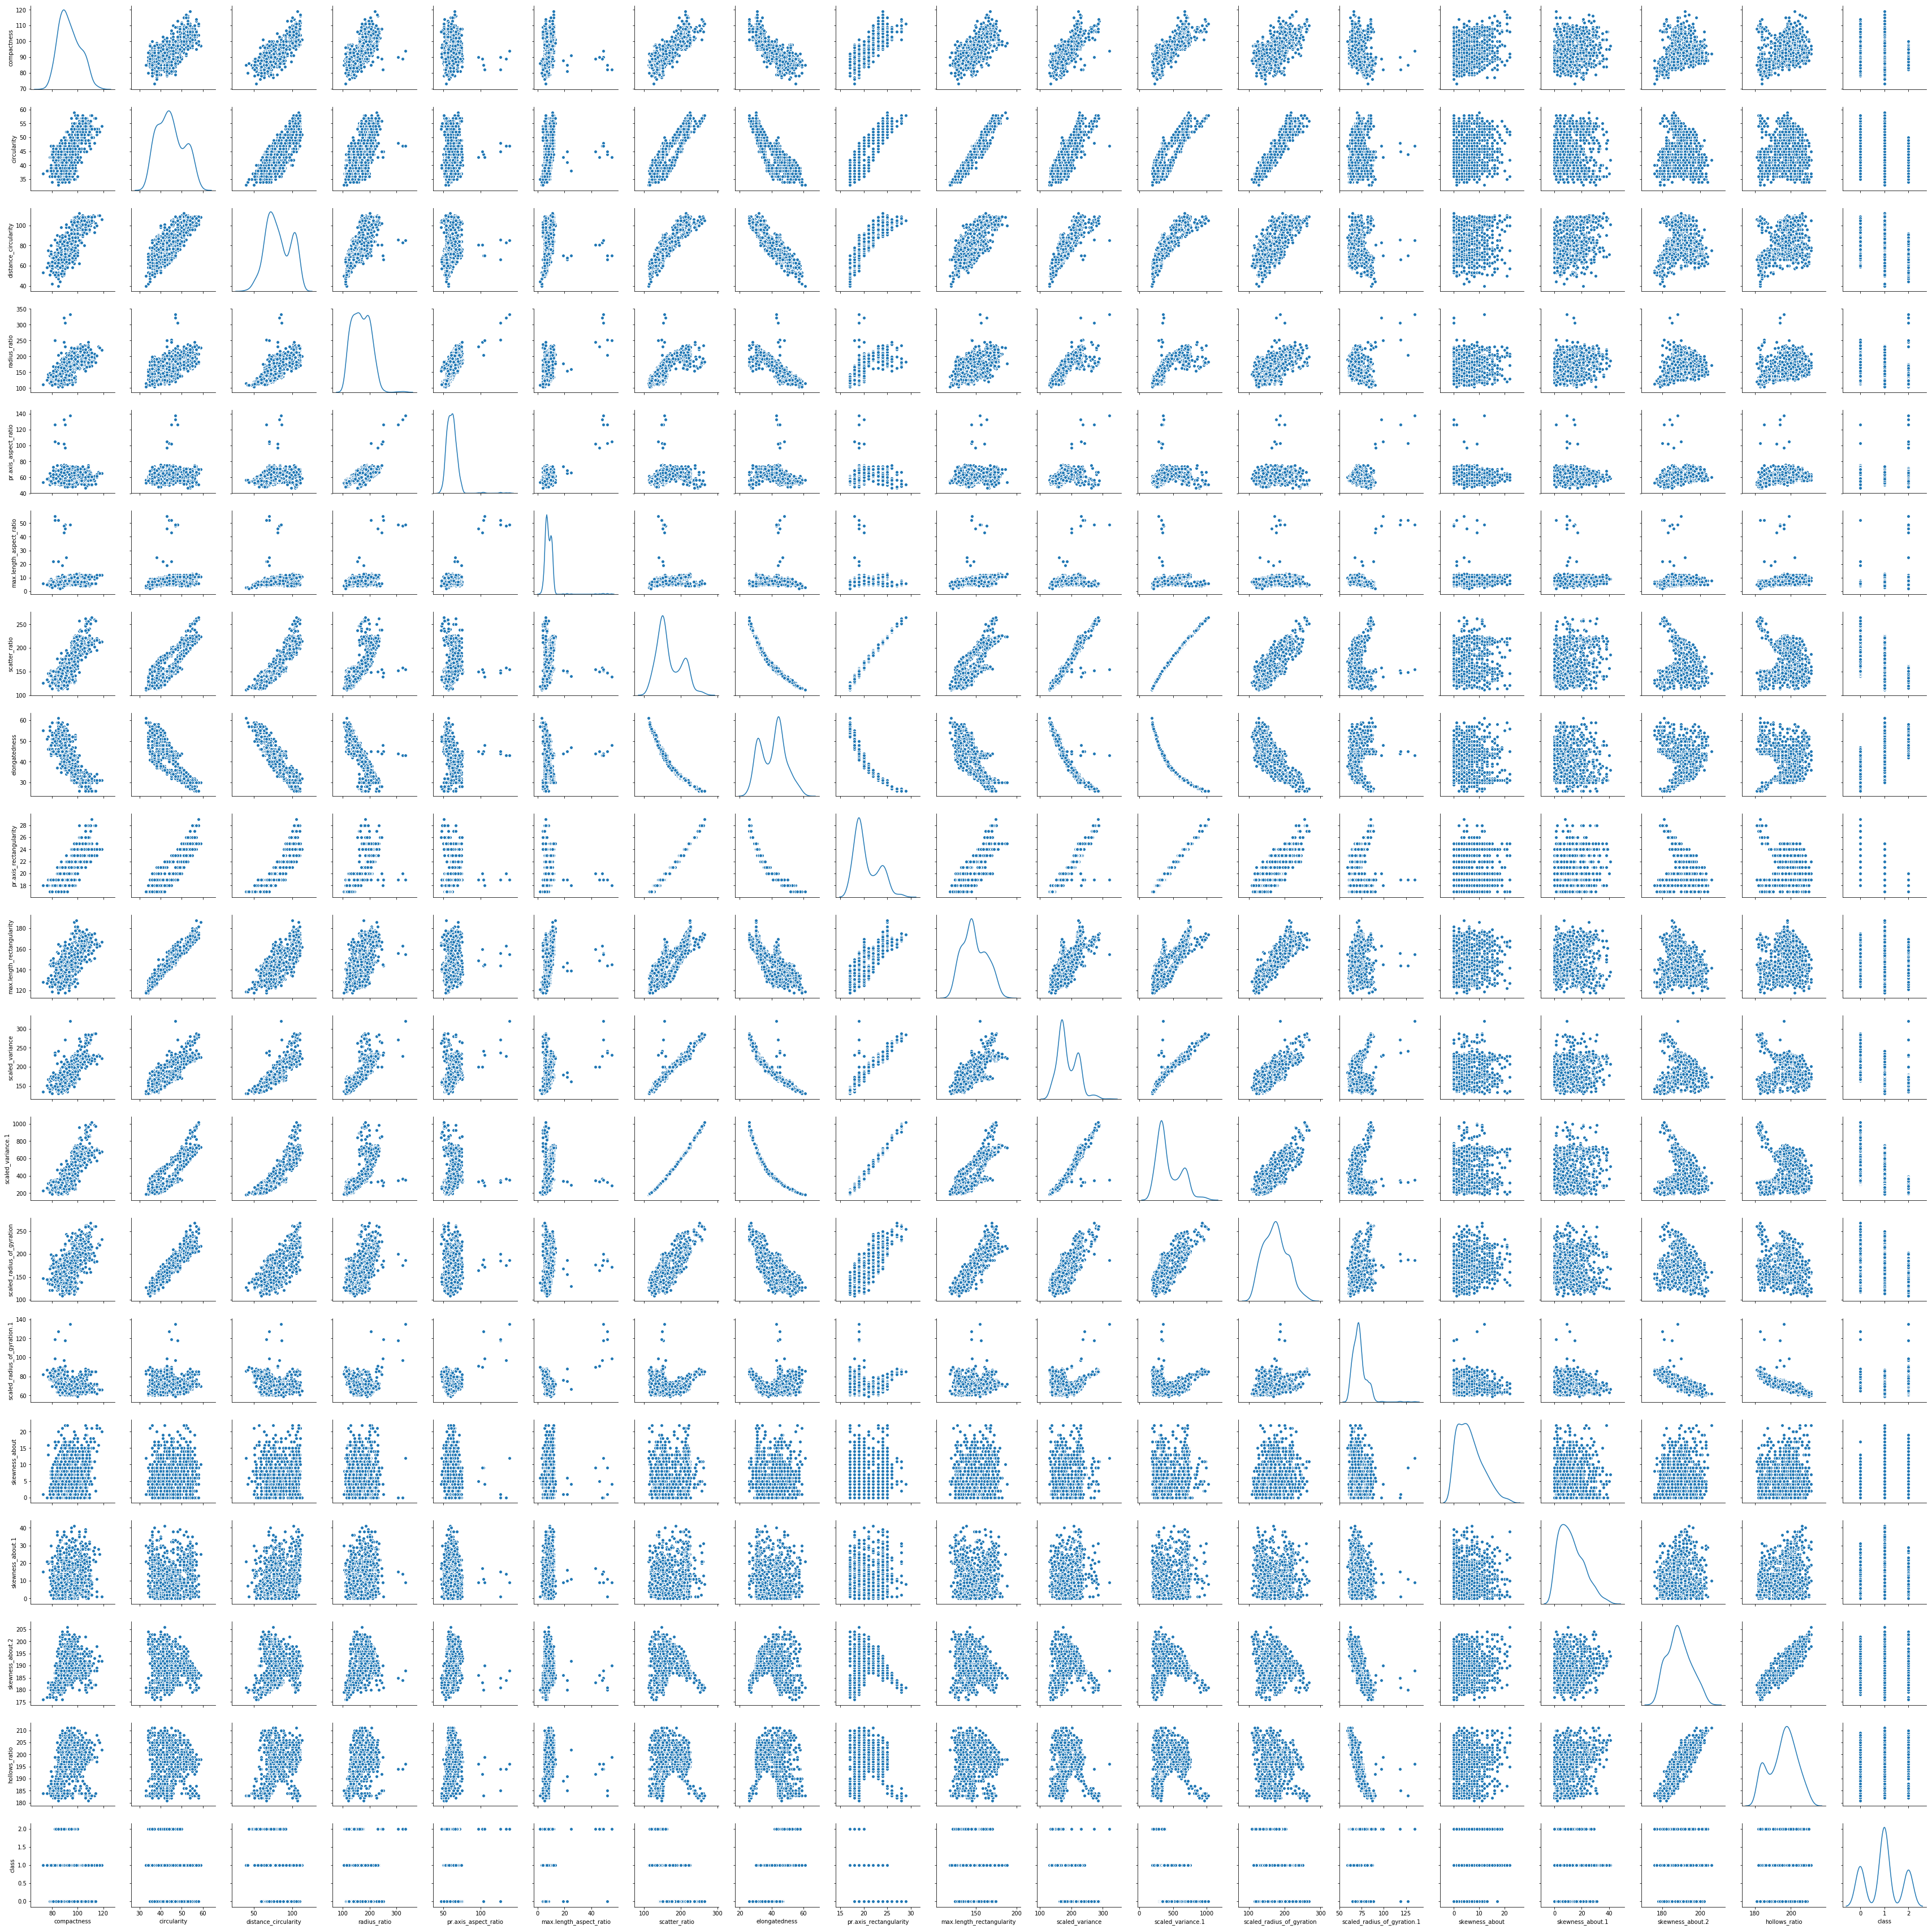

In [88]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df, diag_kind = 'kde')

In [89]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

compactness                       AxesSubplot(0.125,0.749828;0.168478x0.130172)
circularity                    AxesSubplot(0.327174,0.749828;0.168478x0.130172)
distance_circularity           AxesSubplot(0.529348,0.749828;0.168478x0.130172)
radius_ratio                   AxesSubplot(0.731522,0.749828;0.168478x0.130172)
pr.axis_aspect_ratio              AxesSubplot(0.125,0.593621;0.168478x0.130172)
max.length_aspect_ratio        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
scatter_ratio                  AxesSubplot(0.529348,0.593621;0.168478x0.130172)
elongatedness                  AxesSubplot(0.731522,0.593621;0.168478x0.130172)
pr.axis_rectangularity            AxesSubplot(0.125,0.437414;0.168478x0.130172)
max.length_rectangularity      AxesSubplot(0.327174,0.437414;0.168478x0.130172)
scaled_variance                AxesSubplot(0.529348,0.437414;0.168478x0.130172)
scaled_variance.1              AxesSubplot(0.731522,0.437414;0.168478x0.130172)
scaled_radius_of_gyration         AxesSu

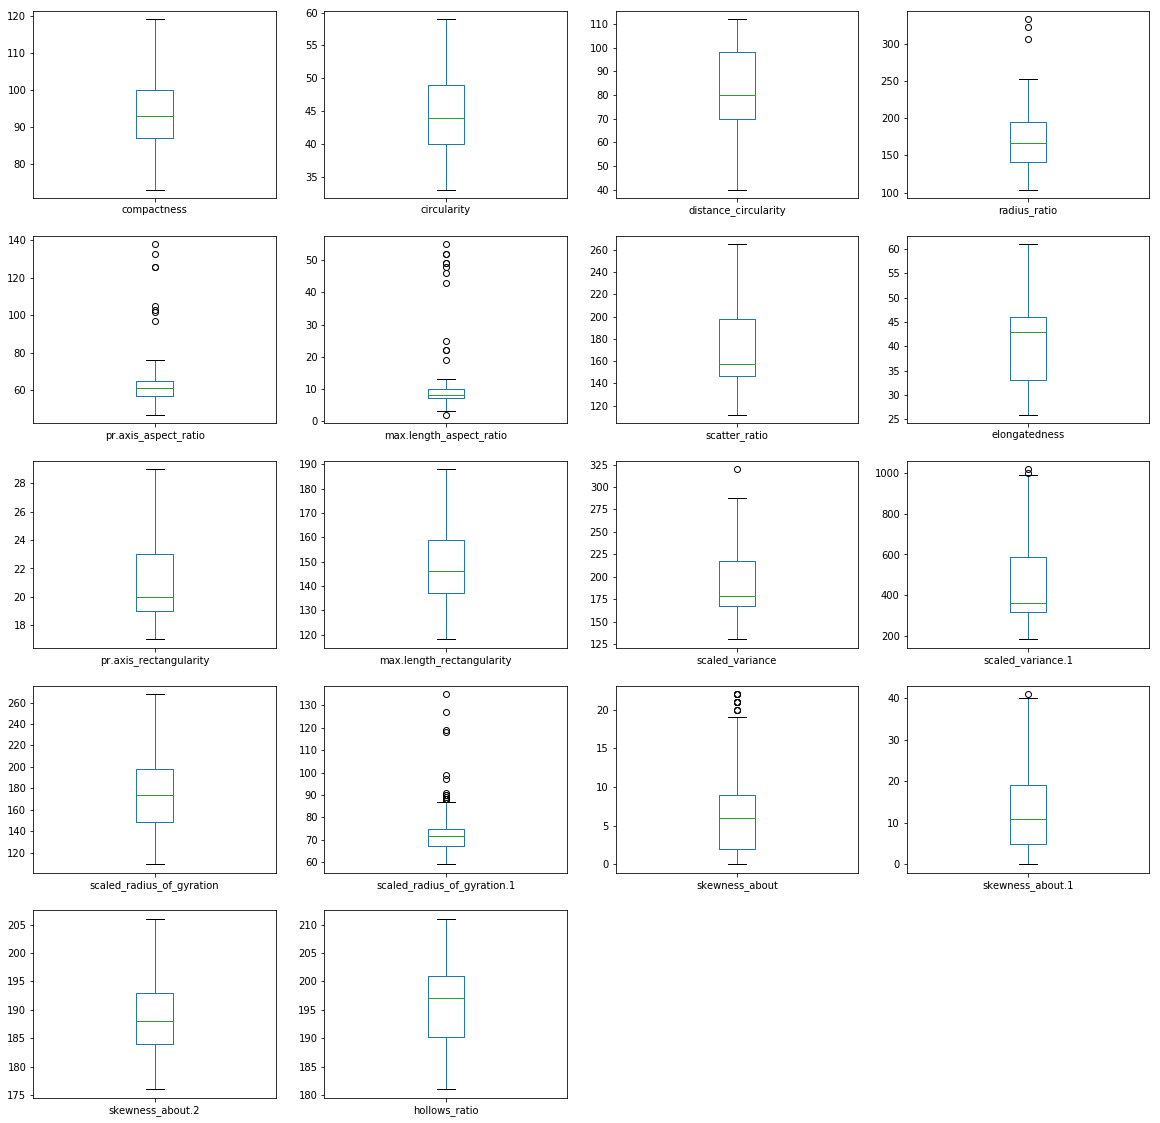

In [90]:
#df[['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about', 'skewness_about.1',
 #      'skewness_about.2']].plot(kind='box',subplots=True,layout=(7,7),figsize=(20,20))

df[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']].plot(kind="box",subplots=True,layout=(5,4),figsize=(20,20))

# As only a few rows are missing values, we can safely replace the Null/NA Values with the mean 

In [91]:
df.fillna(value=df.mean(), inplace=True)

In [92]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [93]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.828775,6.133943,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.110451,15.740902,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.888095,33.400979,104.0,141.00,168.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.678910,7.882119,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.901775,33.195188,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.933728,7.811559,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.582444,2.588326,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


   # In order to work on the outlier we will first check the the threshold values of the identified columns and the count of rows exceeding the Maximum/ Minimum values

In [94]:
df[['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio',
'scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about' ]].quantile(0.75)

radius_ratio                   195.00
pr.axis_aspect_ratio            65.00
max.length_aspect_ratio         10.00
scaled_variance                217.00
scaled_variance.1              586.75
scaled_radius_of_gyration.1     75.00
skewness_about                   9.00
Name: 0.75, dtype: float64

# We will treat the Outliers using the Inter Quartile Range Method i.e Max Value= Q3+ 1.5*IQR

In [95]:
maxradius = df['radius_ratio'].quantile(0.75) + 1.5*(df['radius_ratio'].quantile(0.75) - df['radius_ratio'].quantile(0.25))
maxaxis=df['pr.axis_rectangularity'].quantile(0.75) + 1.5*(df['pr.axis_rectangularity'].quantile(0.75) - df['pr.axis_rectangularity'].quantile(0.25))
maxvar=df['scaled_variance.1'].quantile(0.75) + 1.5*(df['scaled_variance.1'].quantile(0.75) - df['scaled_variance.1'].quantile(0.25))
maxscalgyrn=df['scaled_radius_of_gyration.1'].quantile(0.75) + 1.5*(df['scaled_radius_of_gyration.1'].quantile(0.75) - df['scaled_radius_of_gyration.1'].quantile(0.25))
maxskew=df['skewness_about'].quantile(0.75) + 1.5*(df['skewness_about'].quantile(0.75) - df['skewness_about'].quantile(0.25))
maxskew1=df['skewness_about.1'].quantile(0.75) + 1.5*(df['skewness_about.1'].quantile(0.75) - df['skewness_about.1'].quantile(0.25))
maxaspect=df['pr.axis_aspect_ratio'].quantile(0.75) + 1.5*(df['pr.axis_aspect_ratio'].quantile(0.75) - df['pr.axis_aspect_ratio'].quantile(0.25))
maxlenaspect=df['max.length_aspect_ratio'].quantile(0.75) + 1.5*(df['max.length_aspect_ratio'].quantile(0.75) - df['max.length_aspect_ratio'].quantile(0.25))
maxscaledvar=df['scaled_variance'].quantile(0.75) + 1.5*(df['scaled_variance'].quantile(0.75) - df['scaled_variance'].quantile(0.25))
maxlenaspect_min=df['max.length_aspect_ratio'].quantile(0.26) - 1.5*(df['max.length_aspect_ratio'].quantile(0.75) - df['max.length_aspect_ratio'].quantile(0.25))


In [96]:
df['radius_ratio']=df['radius_ratio'].map(lambda x: maxradius if x>maxradius 
     else x)
df['pr.axis_rectangularity']=df['pr.axis_rectangularity'].map(lambda x: maxaxis if x>maxaxis 
     else x)
df['scaled_variance.1']=df['scaled_variance.1'].map(lambda x: maxvar if x>maxvar 
     else x)
df['scaled_radius_of_gyration.1']=df['scaled_radius_of_gyration.1'].map(lambda x: maxscalgyrn if x>maxscalgyrn 
     else x)
df['skewness_about']=df['skewness_about'].map(lambda x: maxskew if x>maxskew 
     else x)
df['skewness_about.1']=df['skewness_about.1'].map(lambda x: maxskew1 if x>maxskew1 
     else x)
df['pr.axis_aspect_ratio']=df['pr.axis_aspect_ratio'].map(lambda x: maxaspect if x>maxaspect 
     else x)
df['max.length_aspect_ratio']=df['max.length_aspect_ratio'].map(lambda x: maxlenaspect if x>maxlenaspect 
     else x)
df['scaled_variance']=df['scaled_variance'].map(lambda x: maxscaledvar if x>maxscaledvar 
     else x)
df['max.length_aspect_ratio']=df['max.length_aspect_ratio'].map(lambda x: maxlenaspect_min if x<maxlenaspect_min 
     else x)


compactness                       AxesSubplot(0.125,0.749828;0.168478x0.130172)
circularity                    AxesSubplot(0.327174,0.749828;0.168478x0.130172)
distance_circularity           AxesSubplot(0.529348,0.749828;0.168478x0.130172)
radius_ratio                   AxesSubplot(0.731522,0.749828;0.168478x0.130172)
pr.axis_aspect_ratio              AxesSubplot(0.125,0.593621;0.168478x0.130172)
max.length_aspect_ratio        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
scatter_ratio                  AxesSubplot(0.529348,0.593621;0.168478x0.130172)
elongatedness                  AxesSubplot(0.731522,0.593621;0.168478x0.130172)
pr.axis_rectangularity            AxesSubplot(0.125,0.437414;0.168478x0.130172)
max.length_rectangularity      AxesSubplot(0.327174,0.437414;0.168478x0.130172)
scaled_variance                AxesSubplot(0.529348,0.437414;0.168478x0.130172)
scaled_variance.1              AxesSubplot(0.731522,0.437414;0.168478x0.130172)
scaled_radius_of_gyration         AxesSu

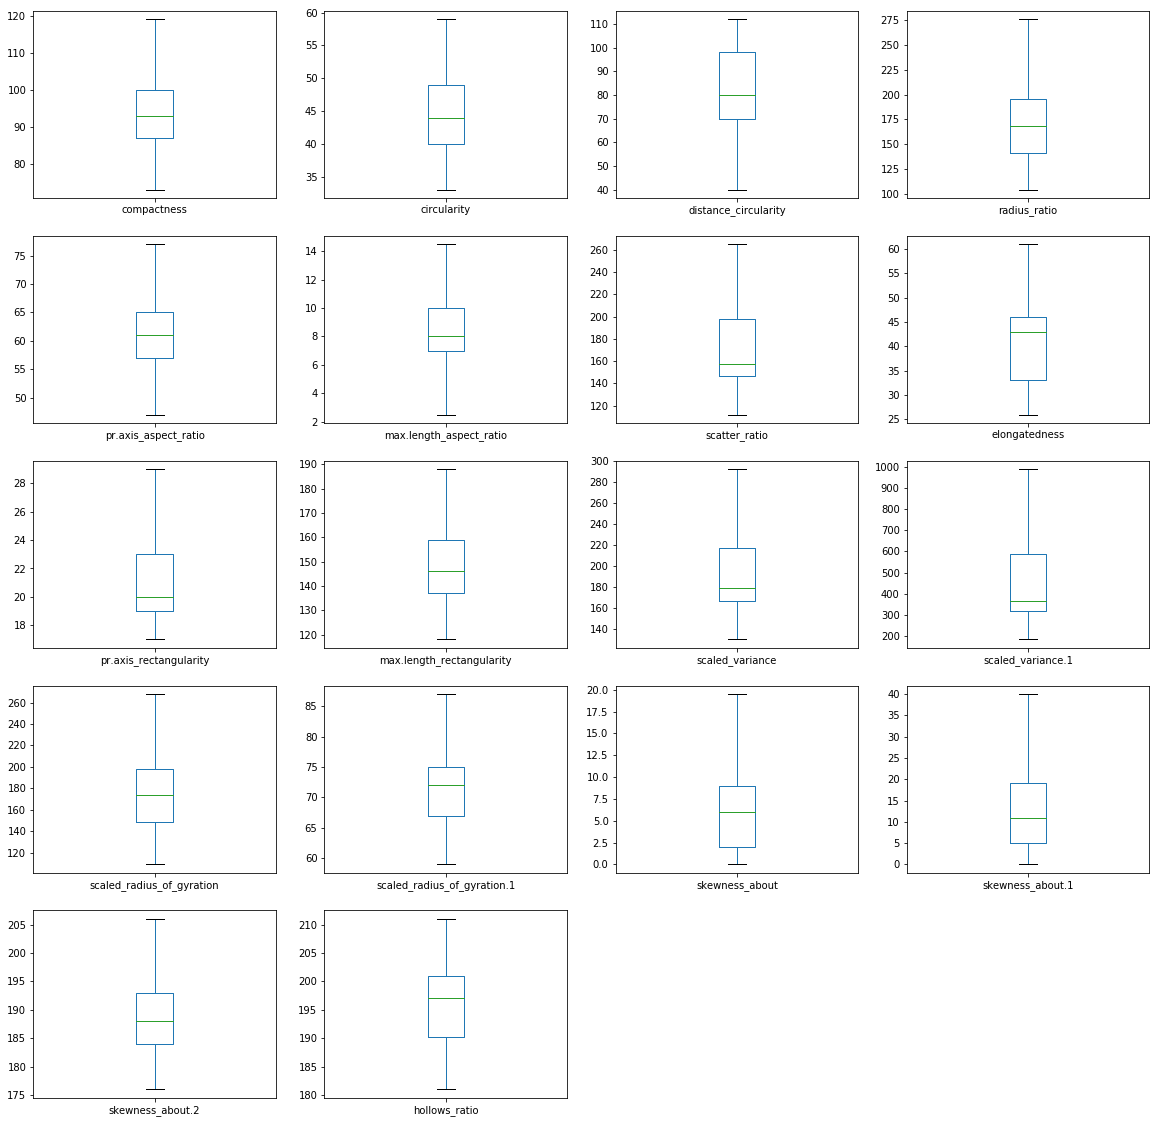

In [97]:
#df[['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about', 'skewness_about.1',
#       'skewness_about.2']].plot(kind='box',subplots=True,layout=(7,7),figsize=(20,20))

df[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']].plot(kind="box",subplots=True,layout=(5,4),figsize=(20,20))

In [98]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.828775,6.133943,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.110451,15.740902,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.730885,32.779085,104.0,141.00,168.0,195.00,276.0
pr.axis_aspect_ratio,846.0,61.307752,5.819351,47.0,57.00,61.0,65.00,77.0
max.length_aspect_ratio,846.0,8.203901,2.206520,2.5,7.00,8.0,10.00,14.5
scatter_ratio,846.0,168.901775,33.195188,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.933728,7.811559,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.582444,2.588326,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


# Ans :2 Relationship between different attributes

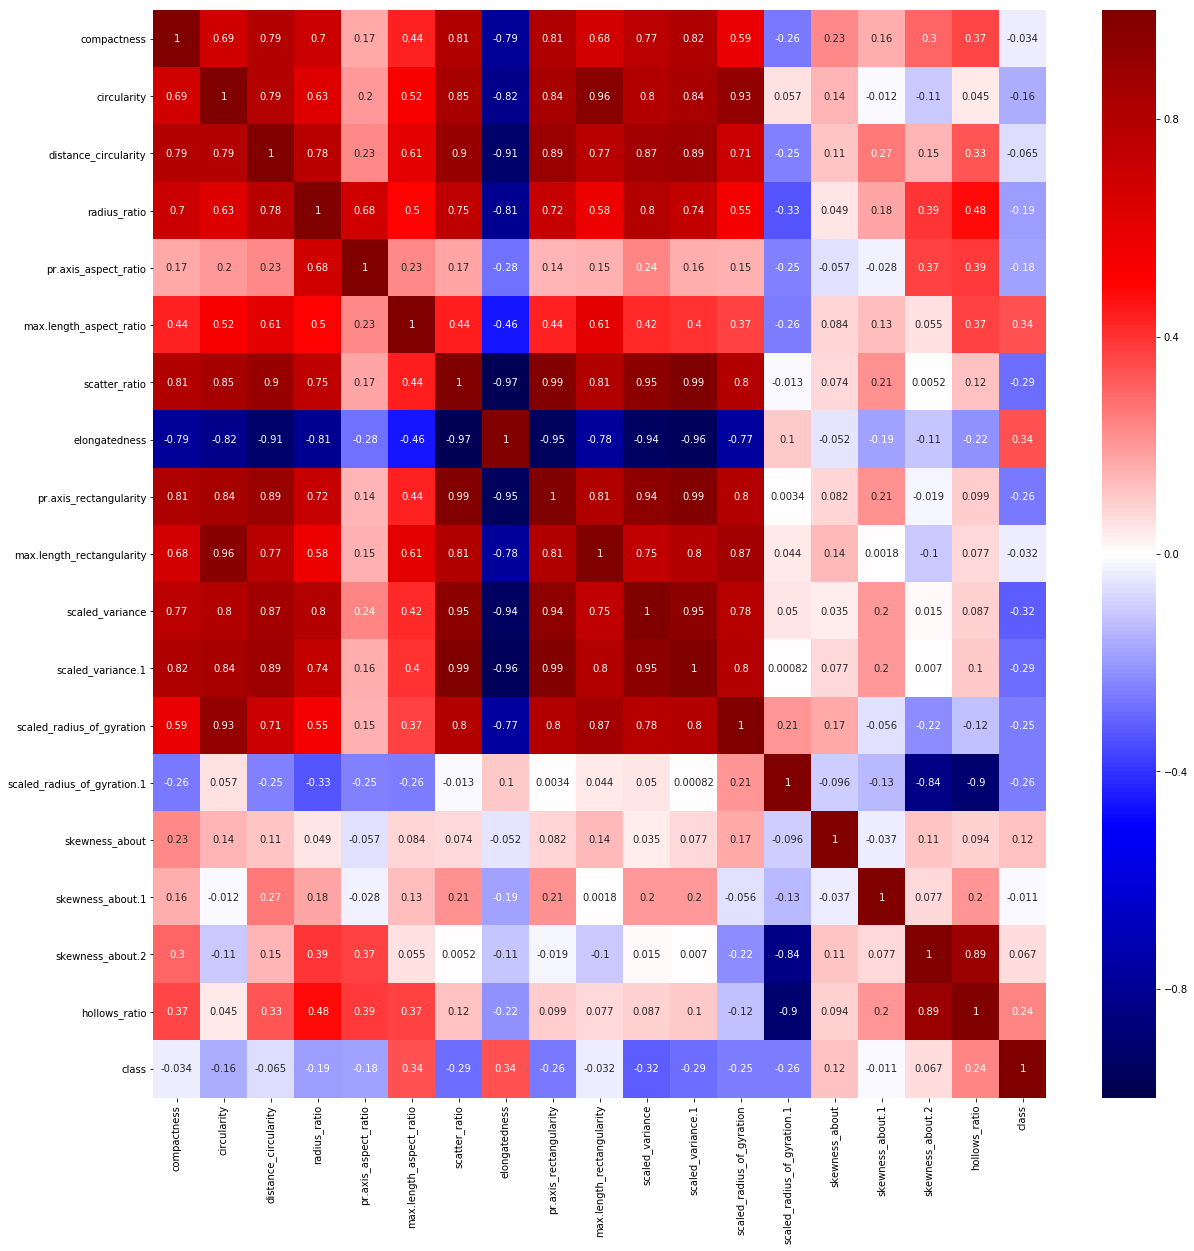

In [99]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


In [143]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

Observations

1) compactness has a very low negative relation with Class but is very highly correlated with scaled radius of gyration one of the two variables can be dropped

2) scatter_ratio has a high negative relation with Class and is also very highly -vely correlated with other variables and can be dropped

3) pr.axis_rectangularity has a high negative relation with Class and is also very highly -vely correlated with other variables and can be dropped

4) max.length_rectangularity has a very low negative relation with Class and is also very highly -vely correlated with other variables and can be dropped

5) scaled_variance  has a high negative relation with Class and is also very highly -vely correlated with other variables and can be dropped

6) scaled_variance.1 has a high negative relation with Class and is also very highly -vely correlated with other variables and can be dropped

7) scaled_radius_of_gyration has a high negative relation with Class and is also very highly -vely correlated with other variables and can be dropped


# As there high correlation between some independent Variables we will eliminate them as mentioned above whilst retaining the target variable. 

# This is Because Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. 

# So, when two features have high correlation, we can drop one of the two features.

In [184]:
data=df
y=data.iloc[:,18]

data = data.iloc[:,1:-1]
corr = data.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [185]:
data.columns

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'elongatedness',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [186]:
data.shape

(846, 11)

# We have removed 7 columns and seperated the Target Variable

In [187]:
data.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,elongatedness,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,48.0,83.0,178.0,72.0,10.0,42.0,70.0,6.0,16.0,187.0,197
1,41.0,84.0,141.0,57.0,9.0,45.0,72.0,9.0,14.0,189.0,199
2,50.0,106.0,209.0,66.0,10.0,32.0,73.0,14.0,9.0,188.0,196
3,41.0,82.0,159.0,63.0,9.0,46.0,63.0,6.0,10.0,199.0,207
4,44.0,70.0,205.0,77.0,14.5,45.0,87.0,9.0,11.0,180.0,183


# Relationship between different Independent variables after removing Highly Correlated data

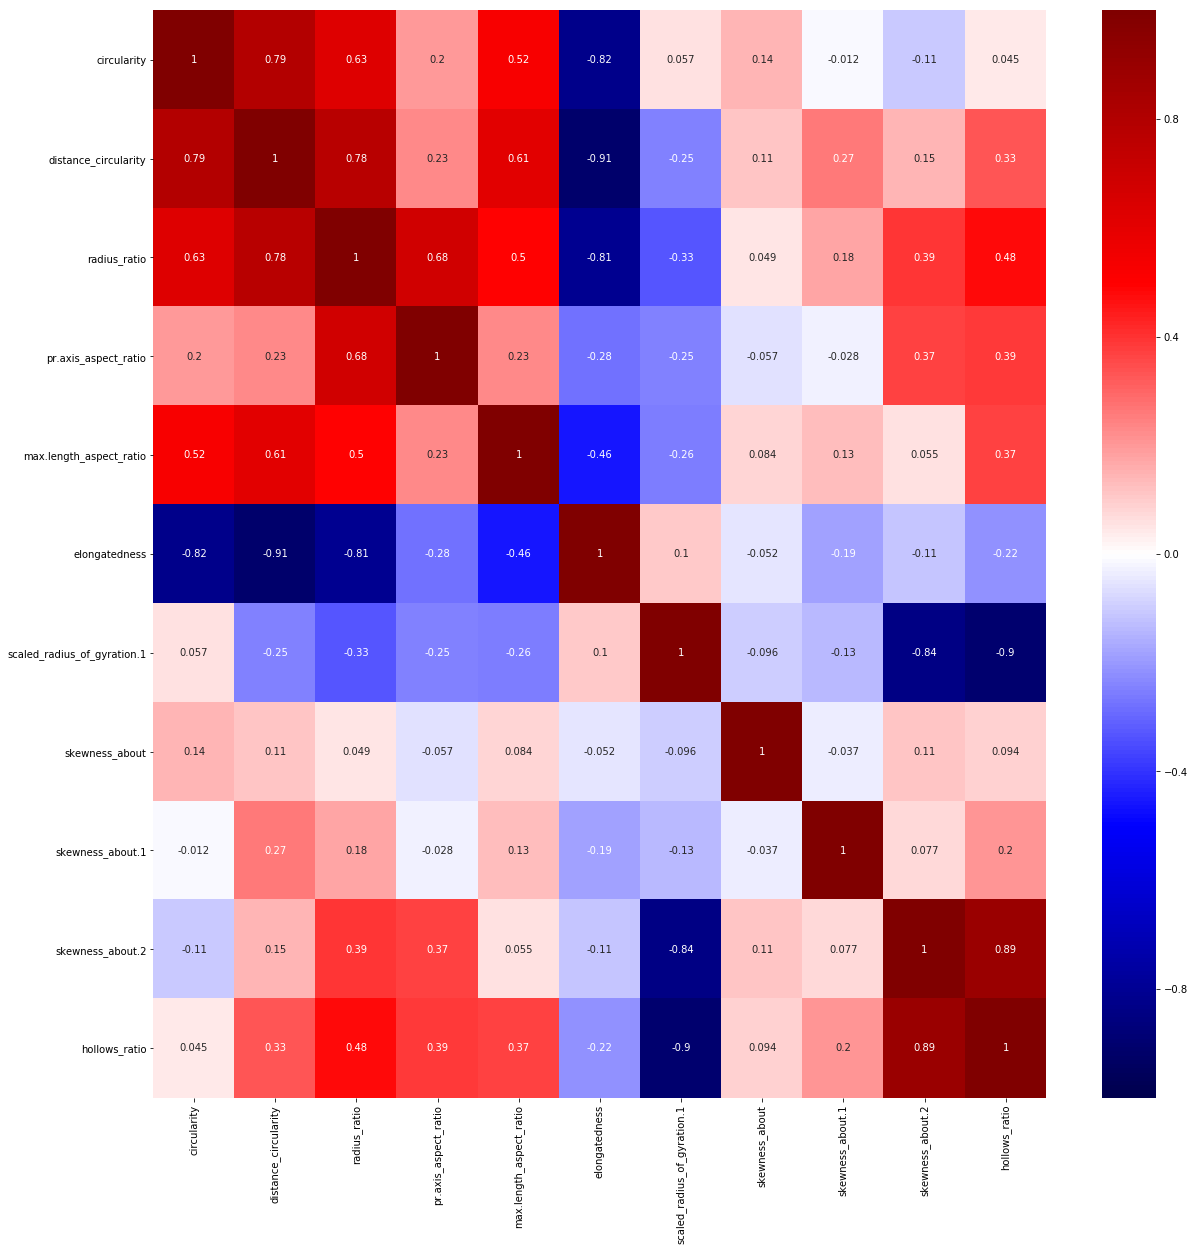

In [189]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


# Ans 3 PCA for Reducing Dimentions

# Before Applying PCA Lets Split the Data into Test and Train

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [191]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [192]:
explained_variance

array([0.422855  , 0.22024045, 0.10056595, 0.09919064, 0.06517365,
       0.05352983, 0.01381506, 0.01177616, 0.00509529, 0.00456507,
       0.0031929 ])

# We can explain the 95% variance by 6 PCA Components

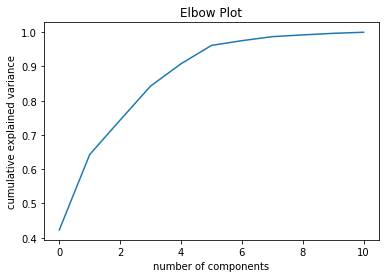

In [193]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Elbow Plot')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


# Same Can be verified by using Below code

In [194]:
pca = PCA(.95)


In [195]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [196]:
pca.n_components_

6

In [197]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 6)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)


# Using pca = PCA(.95) we are able to verify first six components are able to provide 95% of the variance information

# Ans 4 SVM and Grid Search 

In [198]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear', C=1.0) 

In [199]:
# fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred=clf.predict(X_test)

In [200]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9291338582677166

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.91      0.91        78
          1       0.95      0.93      0.94       118
          2       0.92      0.95      0.93        58

avg / total       0.93      0.93      0.93       254



In [202]:
from sklearn.model_selection import GridSearchCV
#def svc_param_selection(X_train, y_train):
Cs= [0.01, 0.05, 0.5, 1] 
#gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs}#, 'gamma' : gammas}
GS= GridSearchCV(SVC('linear'), param_grid, cv=4)
GS.fit(X_train, y_train)
GS.best_params_

# return grid_search.best_params_

{'C': 1}

In [203]:
GS.best_params_


{'C': 1}

In [204]:
Cs= [1,0.01, 0.05, 0.5] 
#gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs}#, 'gamma' : gammas}
GS= GridSearchCV(SVC('rbf'), param_grid, cv=4)
GS.fit(X_train, y_train)
GS.best_params_


{'C': 1}

In [205]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='rbf', C=1.0) 
# fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9488188976377953

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.95      0.95        78
          1       0.97      0.96      0.96       118
          2       0.90      0.93      0.92        58

avg / total       0.95      0.95      0.95       254



# By Using Grid Search We were able to find the optimum value of C as 1, and by using the Kernel RBF we were able to get an final accuracy score of 94.88%

# Kernel RBF provides a better Output than Linear with Better Precision, Accuracy, Recall and F1 Score